# Exemplo de reconstrução de matrizes via LMAFIT

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from lmafit import lmafit_mc_adp as lmft

## Carregando a imagem de um barco
Em escala de cinza, essa imagem pode ser representada por uma matriz.

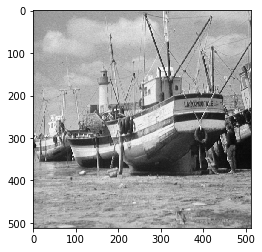

In [3]:
boat = np.loadtxt('boat.dat')
plt.figure()
plt.imshow(boat,cmap = cm.Greys_r)
print('')

### Vamos assumir que conhecemos apenas uma fração dos pixels da imagem

In [11]:
p = 0.30 # fração conhecida. Esses pixels são selecionados aleatoriamente
boatPartial = boat.copy()
shape = np.shape(boat)
mask = (np.random.random_sample(shape) < p)
boatPartial[~mask] = 0.0
Known = np.nonzero(mask)
dat = boat[Known]

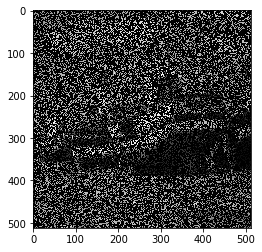

In [12]:
plt.figure()
plt.imshow(boatPartial,cmap = cm.Greys_r)
print('')

### Usando LMAFIT para encontrar as matrizes $U$ e $V$
Veja que estamos assumindo que $k = 20$

In [13]:
U,VT,Out = lmft(shape[0],shape[1],20,Known,dat,0)

### Calculando o produto de $U$ e $V^T$, uma aproximação de rank $k$ para a matriz original

In [14]:
Est = U.dot(VT)

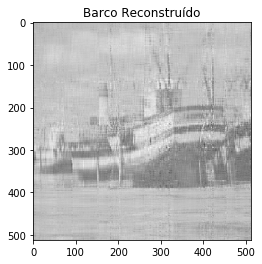

In [15]:
plt.figure()
plt.imshow(Est,cmap = cm.Greys_r)
plt.title('Barco Reconstruído')
plt.subplots_adjust(wspace=0.5)